<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB
None
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.00

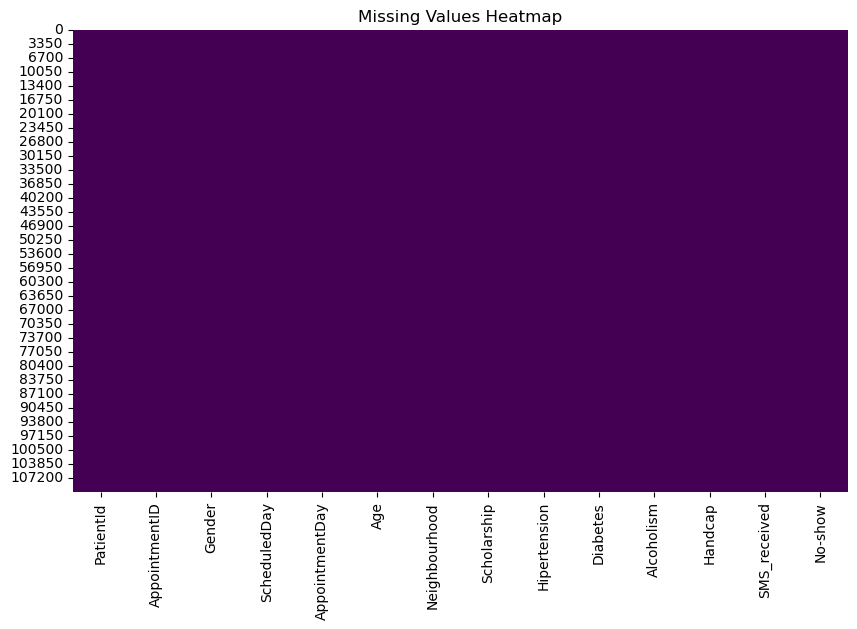

        PatientId  AppointmentID  Gender  ScheduledDay  AppointmentDay    Age  \
0           False          False   False         False           False  False   
1           False          False   False         False           False  False   
2           False          False   False         False           False  False   
3           False          False   False         False           False  False   
4           False          False   False         False           False  False   
...           ...            ...     ...           ...             ...    ...   
110522      False          False   False         False           False  False   
110523      False          False   False         False           False  False   
110524      False          False   False         False           False  False   
110525      False          False   False         False           False  False   
110526      False          False   False         False           False  False   

        Neighbourhood  Scho

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
#file_path = "C:\Users\TEJASWINI\Desktop\healthcare.csv"
df = pd.read_csv(r"C:\Users\TEJASWINI\Desktop\healthcare.csv")

# Step 2: Overview of the data
print(df.info())
print(df.describe())
print(df.head())

# Step 3: Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()
print("===========")
print(df.isnull())
# Step 5: Remove duplicate rows
df.drop_duplicates(inplace=True)

# Step 6: Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
# Save the cleaned dataset in the current working directory (where your Jupyter notebook is located)
cleaned_file_path = "cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to: {cleaned_file_path}")


Cleaned data saved to: cleaned_dataset.csv


In [13]:
print(df.columns.tolist())

['patientid', 'appointmentid', 'gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show']


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv(r"C:\Users\TEJASWINI\Desktop\healthcare.csv")
# Basic data exploration
print(df.head())
print(df.info())
print(df['No-show'].value_counts())

# Data preprocessing
# Convert 'No-show' to binary (1 for no-show, 0 for showed up)
df['No-show'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert ScheduledDay and AppointmentDay to datetime and extract features
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Calculate days between scheduling and appointment
df['DaysUntilAppointment'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Extract day of week from appointment
df['AppointmentDayOfWeek'] = df['AppointmentDay'].dt.dayofweek

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Neighbourhood']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target
features = ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 
            'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 
            'DaysUntilAppointment', 'AppointmentDayOfWeek']
target = 'No-show'

# Handle missing values if any
imputer = SimpleImputer(strategy='median')
df[features] = imputer.fit_transform(df[features])

# Split data into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

         PatientId  AppointmentID Gender          ScheduledDay  \
0   29872499824296        5642903      F  2016-04-29T18:38:08Z   
1  558997776694438        5642503      M  2016-04-29T16:08:27Z   
2    4262962299951        5642549      F  2016-04-29T16:19:04Z   
3     867951213174        5642828      F  2016-04-29T17:29:31Z   
4    8841186448183        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0         

In [30]:
# Train decision tree model
model = DecisionTreeClassifier(
    max_depth=5, 
    min_samples_split=10, 
    min_samples_leaf=5,
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5804457311740402

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.52      0.66     26525
           1       0.30      0.82      0.44      6634

    accuracy                           0.58     33159
   macro avg       0.61      0.67      0.55     33159
weighted avg       0.80      0.58      0.62     33159



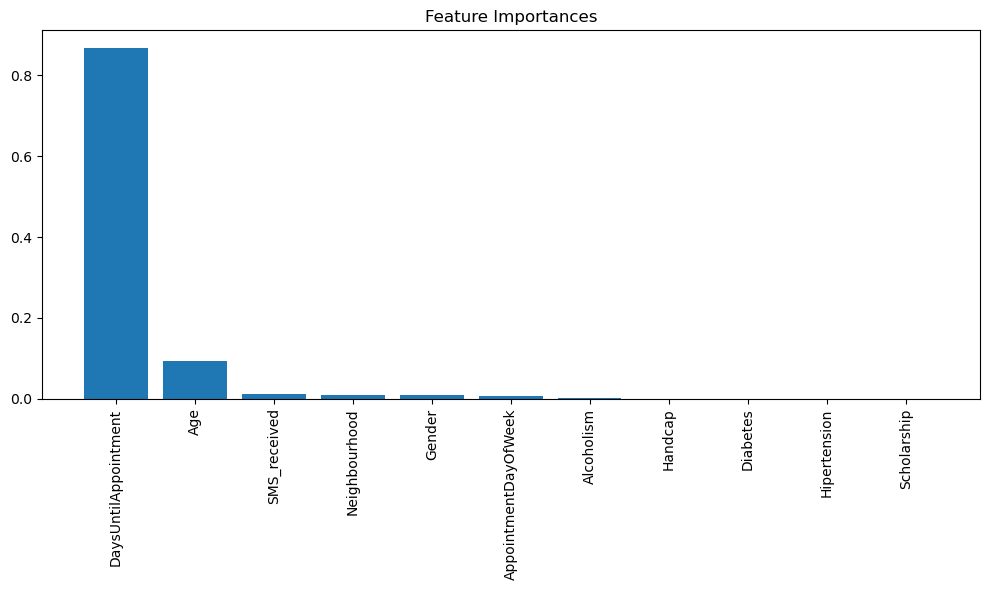

In [32]:
import matplotlib.pyplot as plt
import numpy as np
# Get feature importances
importances = model.feature_importances_
feature_names = features

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'class_weight': ['balanced', None]
}
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',  # Focus on F1 score for imbalanced data
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Evaluate best model
y_pred_best = best_model.predict(X_test)
print("\nImproved Classification Report:")
print(classification_report(y_test, y_pred_best))

Best parameters: {'class_weight': 'balanced', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}

Improved Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.55      0.69     26525
           1       0.30      0.78      0.44      6634

    accuracy                           0.60     33159
   macro avg       0.61      0.67      0.56     33159
weighted avg       0.79      0.60      0.64     33159



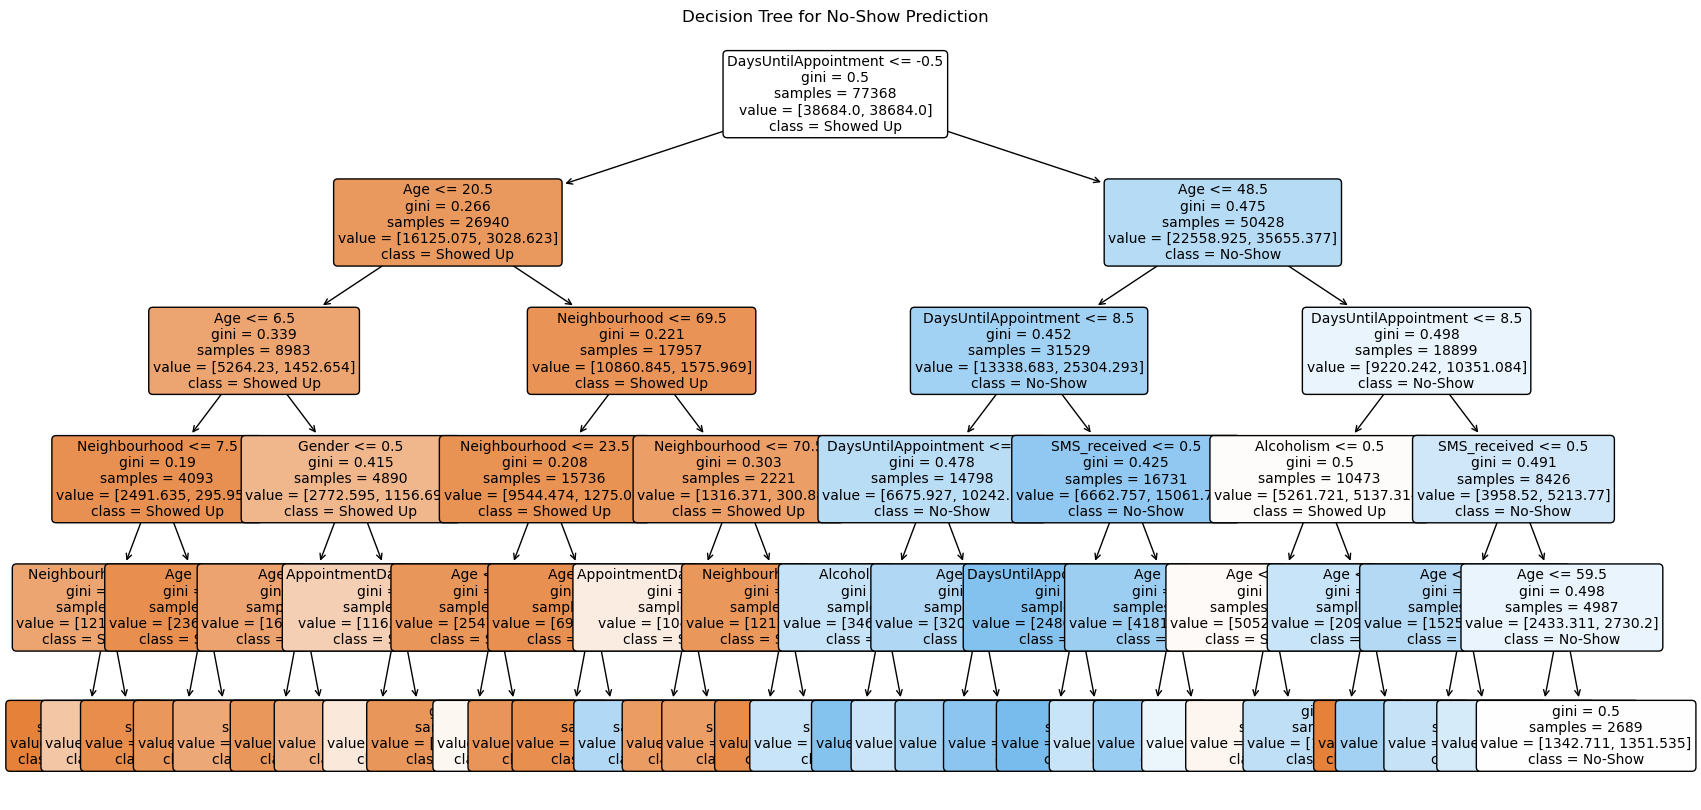

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    model, 
    feature_names=features, 
    class_names=["Showed Up", "No-Show"], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree for No-Show Prediction")
plt.show()
